# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Projeto 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: **
Sim, este é um problema de classificação,por que é esse tipo de problema se resolve pensando em "quem", quem são os alunos que precisão de intervenção é não "quantos", se fosse um problema de "quantos" alunos precisam de intervenção seria regressão visto que seram resultados discretos e não continuos.

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [1]:
!pip install -U scikit-learn scipy matplotlib

In [2]:
!ls ../bases/

student-data.csv


In [3]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score


In [4]:
def load_dataset(path):
    student_data = pd.read_csv(path)
    return student_data
df = load_dataset("../bases/student-data.csv")

### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [12]:
def get_stutents_metrics(base):
    # TODO: Calcule o número de estudante
    n_students = base.shape[0]

    # TODO: Calcule o número de atributos
    n_features = base.shape[1] - 1

    # TODO: Calcule o número de alunos aprovados

    n_passed = base[base['passed']=='yes'].shape[0]

    # TODO: Calcule o número de alunos reprovados
    n_failed = base[base['passed']=='no'].shape[0]

    # TODO: Calcule a taxa de graduação
    passou = float(n_passed * 1.00)
    allstudantes = float(n_students * 1.00)

    grad_rate = ( passou / allstudantes ) * 100

    # Imprima os resultados
    metrics = {
        "total_de_estudantes": n_students,
        "numero_colunas":n_features,
        "numero_aprovados": n_passed,
        "numero_reprovados":n_failed,
        "taxa_graduacao": round(grad_rate,2)
    }
    return metrics

In [13]:
get_stutents_metrics(df)

{'total_de_estudantes': 395,
 'numero_colunas': 30,
 'numero_aprovados': 265,
 'numero_reprovados': 130,
 'taxa_graduacao': 67.09}

## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [14]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [18]:
def plot_target(df, columns):
    plotYes = df[df[columns]=='yes']['absences']
    plotYes.plot()
    plotNot = df[df[columns]=='no']['absences']
    plotNot.plot()


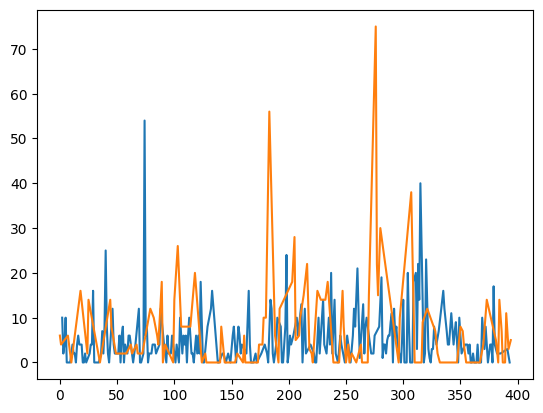

In [19]:
plot_target(df, 'passed')

In [24]:
def target_feature_split(df):
    # Extraia as colunas dos atributo
    feature_cols = list(df.columns[:-1])
    # Extraia a coluna-alvo 'passed'
    target_col = df.columns[-1] 
    # Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
    X_all = df[feature_cols]
    y_all = df[target_col]
    return X_all, y_all

In [44]:
X_all, y_all = target_feature_split(df)

In [43]:
X_all

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [42]:
X_all

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [45]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


/tmp/ipykernel_1819487/3661751441.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, col_data in X.iteritems():


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [46]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.model_selection import train_test_split

def get_train_test_split(X_all, y_all):
    # TODO: Estabeleça o número de pontos de treinamento
    num_train = 300 # 75% dos dados

    # Estabeleça o número de pontos de teste
    num_test = X_all.shape[0] - num_train

    # TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
    X_train, X_test, y_train, y_test = train_test_split(X_all,y_all,test_size=num_test,train_size = 0.75, random_state=42)

    # Mostre o resultado da distribuição
    print("O conjunto de treinamento tem {} amostras.".format(X_train.shape[0]))
    print("O conjunto de teste tem {} amostras.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [47]:
X_train, X_test, y_train, y_test = get_train_test_split(X_all, y_all)

O conjunto de treinamento tem 296 amostras.
O conjunto de teste tem 95 amostras.


In [48]:
X_all

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,20,0,1,0,1,1,...,1,0,0,5,5,4,4,5,4,11
391,0,1,0,1,17,0,1,0,1,0,...,1,1,0,2,4,5,3,4,2,3
392,0,1,0,1,21,1,0,1,0,0,...,1,0,0,5,5,3,3,3,3,3
393,0,1,0,1,18,1,0,0,1,0,...,1,1,0,4,4,1,3,4,5,0


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
0) *Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*

**0) R: Tah, escolhi falar sobre Naive Bayes, Regressão Logistica eeeeeeeeeee chan chan chan chaaaann.... rsrsr Suport Vector MACHINE !!!!**

1) Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
2) Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
3) Quais são as desvantagens do modelo, quando ele tem desempenho pior?

4) O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

 


## Naive Bayes

Aplicação 1.1) Classificação de Spam fiz esse projeto nesse nanodegree gostei muito, da pra aplicar ele tambem para analise de sentimentos. 

Good) 2.1) Naive Bayes - Coisas Boas deste mod rsrsr, first -  não precisa de muitos dados para ter um excelente desempenho, visto que comparado a outros modelos como mais chatinhos como SVM que precisa de MILHÕÕÕÕÕÕÕÕES de dados rsrsr (bastante dados), fora que Naive Bayes pode operar com muitissimas classes, o que por consequencia tem menor tempo e treinamento PS: gosto dele vi sua aplicação há algum tempo nas aulas de estatistica rrsrsrsrsr.

Bad) 3.1) Naive Bayes - Coisa bad sad neste mod Y_Y, ele não tem tanta precisão nos calculos, é indicado normalmente no final do rolê das analises, o que tambem é chato nele é pq tem representações  simples demais e não ajuda melhorar pq n tem esquema de ajustar os parametrozinho como tem em outros algoritmos. 

4.1) Naive Bayes Escolhi este algoritmo devido há quantidade de exemplos que existem na internet pra usar ele, é bem simples de implementar, simples de entender se vc ja viu estatistica alguma vez na faculdade é uma excelente escolha acredito. Vale ressaltar que a simplicidade do modelo ajuda na apresentação para os superiores da escola visto que ele é bastante simples de aplicar e apresentar dados trabalhados nele.

## Regressão Logistica

Aplicação 1.2)  real disso segundo o livro top que li o Data Smart do  autor Jhown W. Foreman ele aplica em campanhas de marketing, no excelente artigo da mackenzie eles falam tambem sobre a estrategia de marketing de fidelizar clientes usando o algoritmo de regress logistic. 

Good) 2.2) Regressão Logística,Coisas boas deste mode e que existem muitas manerias de regularizar o modelo para tolerar o tratamento de alguns erros e evitar os excessos de ajustos
diferente do Bayes, não há nescessidade de preocupação para com recursos correlacionados, diferente de SVM, podemos sim facilmente entrar com novos dados por meio de metodos de gradiente descendente de forma online e facil de trabalhar, outro ponto legal e que no modulo da sklearn possui hipperparametros para ajuste que podem rapidamente fazer grids e validação cruzada, com isso os LR torna prababilidades excelentemente muito calibradas em vez de uma estimativa com maior probabilidade. 

Bad) 3.2) Regressão Logistica - bad things of this mod, bah, ele é linear e não consegue trabalhar com relações complexas e sugeneras, com isso outros algoritmos mais simples podem  ser  melhor que ele nesse ponto, ele requer que as observações sejam independente umas das outras e pretende prever com vase em variaveis independentes, se isso não existir ou não for devidademente identificado, os valores de predição poderam não ser encontrados.

4.2) Regressão Logistica. Neste ponto sobre o consumo de recursos podem ser ligados a RL, ao contrario de NB pode sim lidar com esse problema visto que regularização e ajustes podem evitar treinos viciados devido ao conjunto de dados com bastantes recursos. 

## Suport Vector Machine

Aplicação 1.3) Aplicação de detecção de genero usando reconheimento de imagem com coorelação, usado pelo pessoal da ufrj. 

Good) 2.3) Suporte Vector MACHINEEE !!! Good things of this module, tem excelente parâmetros de regularização para tolerar alguns erros e evitar o ajustes excessivos. Possui uns hackes de Kernel que permite que os users construir uma base de conhecimentos especializado sobre o problema através dos hacks do kernel, ele tabem fornece uma boa generalização fora da amostra, se os parâmetros C e gama forem apropriadamente ajustados, com isso SVM pode ser bastante robusto mesmo que a amostra de treno tenha alguns viés.
            
Bad) 3.3) Suport Vector Machine ! Coisa bad deste modulo, caro pra treinar por causa do tempo de treino, custo computacional mt mt high, precisa manjar das funções de kernel dele pra operar bem o algoritmo. 

4.3) Suporte Vector MACHINE !  
Eu escolhi por que ele é bem robusto pra resolver o problema usando muitos recursos podem ser correlacionados e na regularização para evitar overfitting devido ao conjunto de dados com muitos recursos.
 

### FONTES
Naive Bayes

https://web.stanford.edu/class/cs124/lec/naivebayes.pdf

https://www.vooo.pro/insights/6-passos-faceis-para-aprender-o-algoritmo-naive-bayes-com-o-codigo-em-python/

Regressão Logistica

CAPITULO 6 - DATA SMART JHOWN W. FOREMAN.

http://www.mackenzie.br/fileadmin/Pesquisa/pibic/publicacoes/2011/pdf/epro/karina_cavalcante.pdf

Suport Vector MACHINE ! 

http://pee.ufrj.br/teses/textocompleto/2010021901.pdf
http://www.semantix.com.br/10-algoritmos-de-machine-learning/

### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [49]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print("O modelo foi treinado em {:.4f} segundos".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print("As previsões foram feitas em {:.4f} segundos.".format(end - start))
    return f1_score(target.values, y_pred, pos_label="yes")

    
def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print("Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print("Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [50]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# TODO: Inicialize os três modelos
classificador_A = GaussianNB()
classificador_B = SVC(random_state=0)
classificador_C = LogisticRegression(random_state=0,n_jobs=-1)


# TODO: Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)
for classificador in [classificador_A, classificador_B, classificador_C]:
    print("\tTreinando " + str(classificador) + "\n\n")
    for n_train in [100, 200, 300]:
        train_predict(classificador, X_train[:n_train], y_train[:n_train], X_test, y_test)
        print ("\n")
    for n_train in [200]:
        train_predict(classificador, X_train[:n_train], y_train[:n_train], X_test, y_test)
        print ("\n")     
    for n_train in [300]:
        train_predict(classificador, X_train[:n_train], y_train[:n_train], X_test, y_test)
        print ("\n")      
    print ("\n\n")     

	Treinando GaussianNB()


Treinando um GaussianNB com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0027 segundos
As previsões foram feitas em 0.0017 segundos.
Pontuação F1 para o conjunto de treino: 0.8467.
As previsões foram feitas em 0.0015 segundos.
Pontuação F1 para o conjunto de teste: 0.8029.


Treinando um GaussianNB com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0019 segundos
As previsões foram feitas em 0.0014 segundos.
Pontuação F1 para o conjunto de treino: 0.8406.
As previsões foram feitas em 0.0015 segundos.
Pontuação F1 para o conjunto de teste: 0.7244.


Treinando um GaussianNB com 296 pontos de treinamento. . .
O modelo foi treinado em 0.0021 segundos
As previsões foram feitas em 0.0014 segundos.
Pontuação F1 para o conjunto de treino: 0.8067.
As previsões foram feitas em 0.0015 segundos.
Pontuação F1 para o conjunto de teste: 0.7634.


Treinando um GaussianNB com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0013 segundos
As prev

/tmp/ipykernel_1819487/2082195120.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_predict(classificador, X_train[:n_train], y_train[:n_train], X_test, y_test)
/tmp/ipykernel_1819487/2082195120.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_predict(classificador, X_train[:n_train], y_train[:n_train], X_test, y_test)
/tmp/ipykernel_1819487/2082195120.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future ver

O modelo foi treinado em 0.8627 segundos
As previsões foram feitas em 0.0019 segundos.
Pontuação F1 para o conjunto de treino: 0.8696.
As previsões foram feitas em 0.0016 segundos.
Pontuação F1 para o conjunto de teste: 0.7794.


Treinando um LogisticRegression com 200 pontos de treinamento. . .


/home/juan-nascimento/.test/intervencao_estudantes/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_1819487/2082195120.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_predict(classificador, X_train[:n_train], y_train[:n_train], X_test, y_test)


O modelo foi treinado em 0.2201 segundos
As previsões foram feitas em 0.0073 segundos.
Pontuação F1 para o conjunto de treino: 0.8562.
As previsões foram feitas em 0.0014 segundos.
Pontuação F1 para o conjunto de teste: 0.7914.


Treinando um LogisticRegression com 296 pontos de treinamento. . .


/home/juan-nascimento/.test/intervencao_estudantes/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_1819487/2082195120.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_predict(classificador, X_train[:n_train], y_train[:n_train], X_test, y_test)


O modelo foi treinado em 0.2971 segundos
As previsões foram feitas em 0.0014 segundos.
Pontuação F1 para o conjunto de treino: 0.8416.
As previsões foram feitas em 0.0012 segundos.
Pontuação F1 para o conjunto de teste: 0.7941.


Treinando um LogisticRegression com 200 pontos de treinamento. . .


/home/juan-nascimento/.test/intervencao_estudantes/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_1819487/2082195120.py:23: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_predict(classificador, X_train[:n_train], y_train[:n_train], X_test, y_test)


O modelo foi treinado em 0.2923 segundos
As previsões foram feitas em 0.0083 segundos.
Pontuação F1 para o conjunto de treino: 0.8562.
As previsões foram feitas em 0.0017 segundos.
Pontuação F1 para o conjunto de teste: 0.7914.


Treinando um LogisticRegression com 296 pontos de treinamento. . .
O modelo foi treinado em 0.2850 segundos
As previsões foram feitas em 0.0087 segundos.
Pontuação F1 para o conjunto de treino: 0.8416.
As previsões foram feitas em 0.0019 segundos.
Pontuação F1 para o conjunto de teste: 0.7941.







/home/juan-nascimento/.test/intervencao_estudantes/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Resultados em tabelas
Edite a célula abaixo e veja como a tabela pode ser desenhada em [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). Você deve salvar seus resultados abaixo nas tabelas fornecidas.

** Classificador 1 - **  GaussianNB

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |      0,0015                |           0.0006                 |   0.7970                         |               0.7009       |
| 200                                |   0.0029                   |              0.0007              |        0.8166                        |                0.7731      |
| 300                                |         0.0016             |               0.0004             |    0.7981                          |               0.7521       |

** Classificador 2 - **  SVC

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |         0.0018             |         0.0013                  |  0.8466                            |                 0.7682     |
| 200                                |  0.0051             |                    0.0017        |       0.8777                      |                 0.7568     |
| 300                                |        0.0091              |               0.0026              |   0.8697                         |                 0.7448     |

** Classificador 3 - **  LogisticRegression

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |           0,0015           |          0.0003                   |     0.8784                       |              0.7463        |
| 200                                |      0.0028                |                0.0004             |    0.8381                           |         0.7704             |
| 300                                |     0.0029                 |               0.0004              |     0.8333                       |          0.7424            |

## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: ** 
O que é Suporte Vector Machine ?
SVM é uma tecnica de aprendizado de maquina supervisionado, que os resultados da aplicaçao da tecnica são comparaveis e muitas vezes superiores a algoritmos de RNA, com aplicação em diversas areas como analise de texto, imagens, e bioinformatica. Ela se torna interressante pelo fato de seu aprendizado ser baseado em aprindizado estatistico, visto que sua capacidade de prever corretamente a classe de dados do mesmo donimio em que o aprendizado ocorreu.

Como funciona Estapas de treinamento do SVM ? 
Inicianmente ela mapea todos os dados em um espaço variavelmente dimensional para que os pontos dos dados possa ser categorizados, mesmo se os dados não forem linearmente separados,PS: com hacks de Kernel rola sim, após separar os dados serão transformados de modo que separados possam ser plotados como um hiperplano, dps disse podemos utilizar as novas caracteristicas dos novos dados para prever agrupamentos ao qual novo dados de entrada pertenceram.
Como Validar o Modelo ? 

Como Aplicar o Modelo ? 

Comparando modelos creio que Suporte Vector Machine com um grau de acertividade maior na pontução do F1 visto que os demais visto que em Niveis de Pontuação de F1 o Scores se torna maior comparado com os modelos de Naive Bayes e LogisticRegression. Em Contra partida SVM demorou mais em tempo de treino e test comparado com os outros 2. Ou seja, SVM hoje !  SVM AMANHA ! SVM SEMPRE ! (SVM teve melhor desempenho, porem com um tempo de treino e test mais demorado que os demais) enfim conclui que os 3 são mt bons soq eu escolhi o SVM ** {>////<} **

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: **
Pense em um quadro pontilhados com varios pontos separados por cores, verde, amarelo, azul e rosa. Visto que todos estão nos respectivo cantos do quadro, o modelo Suporte Vector Machine, ele divide os dados como um ninja cortando a tela em 4 grupos no caso do quadro, com isso ele classifica os dados nas fronteiras da tomade decisão, ele é muito conhecido por ser um classificador binario, porem se vc usar uns "truques" tipo hasquear usando Kernel, consegue pegar não apenas 2 tipos de classes porem todas as classes processando dados que seriam lineares e não lineares, podendo assim ajustar o modelo para melhor performace nas tomadas de decisão.HAHA ! 

## Etapas 

- Uma (SVM) é um algoritmo de aprendizado de máquina supervisionado que pode ser empregado para propósitos de classificação e regressão. SVMs são mais comumente usados em problemas de classificação e, como tal, é nisso que vamos nos concentrar neste post. Os SVMs baseiam-se na ideia de encontrar um hiperplano que melhor divida um conjunto de dados em duas classes, como mostra a imagem abaixo.
![1](../images/svm0.png)
---
-  Os Vectores Suporte são os pontos de dados mais próximos do hiperplano, os pontos de um conjunto de dados que, se removidos, alterariam a posição do hiperplano divisor. Por causa disso, eles podem ser considerados os elementos críticos de um conjunto de dados. 
  O que é um hiperplano?
  Como um exemplo simples, para uma tarefa de classificação com apenas dois recursos (como a imagem acima), você pode pensar em um hiperplano como uma linha que separa e classifica linearmente um conjunto de dados.

  Intuitivamente, quanto mais longe do hiperplano nossos pontos de dados estiverem, mais confiantes estaremos de que foram classificados corretamente. Portanto, queremos que nossos pontos de dados estejam o mais longe possível do hiperplano, enquanto ainda estivermos do lado correto dele.
  Então, quando novos dados de teste são adicionados, qualquer lado do hiperplano que ele for decidirá a classe que atribuímos a ele.
  Como encontramos o hiperplano certo?Ou, em outras palavras, como separar melhor as duas classes nos dados?
  A distância entre o hiperplano e o ponto de dados mais próximo de qualquer conjunto é conhecida como margem. O objetivo é escolher um hiperplano com a maior margem possível entre o hiperplano e qualquer ponto dentro do conjunto de treinamento, dando uma chance maior de novos dados serem classificados corretamente.
![2](../images/svm1.png)
---
- Mas o que acontece quando não há hiperplano claro?
 É aqui que pode ficar complicado. Os dados raramente são tão limpos quanto o nosso exemplo simples acima. Um conjunto de dados muitas vezes parece mais com as bolas confusas abaixo, que representam um conjunto de dados linearmente não separável.
![3](../images/svm2.png)
---  
- Para classificar um conjunto de dados como o acima, é necessário se afastar de uma visualização em 2D dos dados para uma visualização em 3D. Explicar isso é mais fácil com outro exemplo simplificado. Imagine que nossos dois conjuntos de bolas coloridas acima estão sentados em um lençol e este lençol é levantado de repente, lançando as bolas no ar. Enquanto as bolas estão no ar, você usa a folha para separá-las. Este "levantamento" das bolas representa o mapeamento dos dados em uma dimensão maior. Isso é conhecido como kernelling. Você pode ler mais sobre Kerneling
![]
--- 

![4](../images/svm3.png)

- Porque agora estamos em três dimensões, nosso hiperplano não pode mais ser uma linha. Agora deve ser um plano, como mostrado no exemplo acima. A ideia é que os dados continuem sendo mapeados em dimensões cada vez maiores até que um hiperplano possa ser formado para segregá-lo.
![]
--- 

###### Fontes: 
- svm para datasciences Juniors: https://69206c696b652074686973.blogspot.com.br/2018/04/suporte-vector-machine-para-datascience.html

- svm for dummies: http://blog.aylien.com/support-vector-machines-for-dummies-a-simple/ 

- eli5: https://www.reddit.com/r/MachineLearning/comments/15zrpp/please_explain_support_vector_machines_svm_like_i/

- SVM WIKI Aprendis: http://aprendis.gim.med.up.pt/index.php/Support_Vector_Machines 

### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [51]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit

# TODO: Crie a lista de parâmetros que você gostaria de calibrar
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100]}]

# TODO: Inicialize o classificador
classificador =  SVC(random_state=0)

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 

f1_scorer = make_scorer(f1_score, pos_label="yes") 

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação

grid_obj = GridSearchCV(classificador, parameters, scoring=f1_scorer)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj =  grid_obj.fit(X_train, y_train)

# Get the estimator
classificador = grid_obj.best_estimator_

### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: **

In [52]:
# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print("O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(classificador, X_train, y_train)))
print("O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(classificador, X_test, y_test)))

As previsões foram feitas em 0.0033 segundos.
O modelo calibrado tem F1 de 0.8552 no conjunto de treinamento.
As previsões foram feitas em 0.0014 segundos.
O modelo calibrado tem F1 de 0.7761 no conjunto de teste.


O modelo estimado na fase de tunning ficou teve pontuação menor do que o utilizado nos ensaios anteriores, utilizando os parâmetros padrões.


1. Antes do tunning F1 Score de treino dava 0.7970
2. Dps do Tunning F1 Score de treino 0.8552

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.

## Salvando Modelo

In [53]:
import pickle

In [54]:
predict_labels(classificador, X_test, y_test)

As previsões foram feitas em 0.0024 segundos.


0.7761194029850748

In [55]:
classificador

SVC(C=1, kernel='linear', random_state=0)

In [57]:
filename = '../model/student_intervention.sav'
pickle.dump(classificador, open(filename, 'wb'))

## Carregando Modelo

In [35]:

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [49]:
result = loaded_model.score( X_test.head(), y_test.head())
print(result)

0.4


In [50]:
result = loaded_model.score( X_test, y_test)

In [51]:
result

0.6842105263157895